# Instance Segmentation with Point Prompts and SAM 3

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeos/segment-geospatial/blob/main/docs/examples/sam3_point_prompts.ipynb)

This notebook demonstrates how to use the Segment Anything Model 3 (SAM3) for interactive instance segmentation using point and box prompts.

## Installation


In [4]:
%pip install "segment-geospatial[samgeo3]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of sam3 to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.3/188.3 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 667.8/667.8 kB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.3/137.3 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 915.7/915.7 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 112.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Import Libraries


In [1]:
from samgeo import SamGeo3, download_file, show_image

## Download Sample Data


In [2]:
url = "https://raw.githubusercontent.com/facebookresearch/sam3/refs/heads/main/assets/images/truck.jpg"
image_path = download_file(url)

Downloading...
From: https://raw.githubusercontent.com/facebookresearch/sam3/refs/heads/main/assets/images/truck.jpg
To: /content/truck.jpg
100%|██████████| 271k/271k [00:00<00:00, 18.3MB/s]


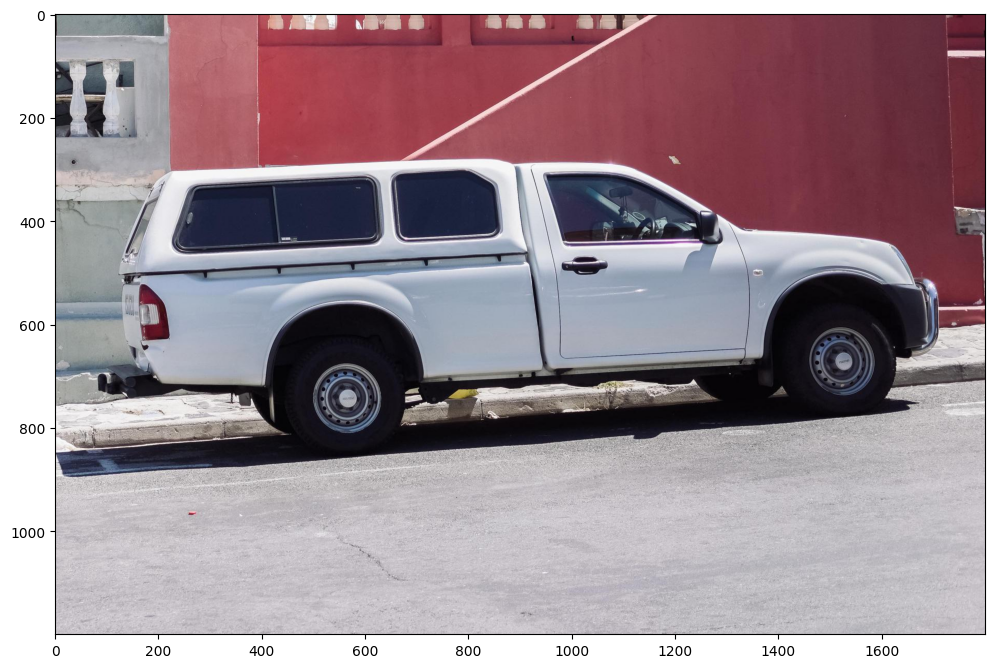

In [3]:
show_image(image_path, axis="on")

![](https://github.com/user-attachments/assets/7c155676-0e08-4d6d-b5b9-341edc6ccb6c)

## Initialize SAM3

To use point and box prompts (SAM1-style interactive segmentation), initialize SAM3 with `enable_inst_interactivity=True`.


In [7]:
!pip install "segment-geospatial[samgeo3]"

In [ ]:
# 1. Install Meta SAM 3 core from source
%pip install git+https://github.com/facebookresearch/sam3.git

# 2. Install segment-geospatial with the required extras
%pip install "segment-geospatial[samgeo3]"

# 3. Force a specific NumPy version to resolve the conflicts you encountered
# (SAM 3 requires < 2.0, while some of your other tools want > 2.0)
%pip install "numpy>=1.26.4,<2.0.0"

# IMPORTANT: After this cell finishes, go to the menu:
# Runtime -> Restart Session (or Restart Kernel)

In [ ]:
from samgeo import SamGeo3
sam = SamGeo3(backend="meta", enable_inst_interactivity=True)

In [1]:
sam.set_image(image_path)

NameError: name 'sam' is not defined

## Generate Masks by Point Prompts

Select an object by clicking a point on it. Points are input in (x, y) format with labels:
- 1 = foreground point (include this region)
- 0 = background point (exclude this region)


In [ ]:
# Single foreground point - input as Python list
sam.generate_masks_by_points([[520, 375]])

In [ ]:
print(sam.masks)

In [ ]:
print(sam.scores)

## Visualize Point Prompts


In [ ]:
sam.show_points([[520, 375]], [1])

![](https://github.com/user-attachments/assets/b7b549db-3cff-4a08-a190-634d19978df7)

## Show the Results


In [ ]:
sam.show_anns()

![](https://github.com/user-attachments/assets/93424ade-313c-4c6c-82ef-264461df3434)

In [ ]:
sam.show_masks()

## Save Masks


In [ ]:
sam.save_masks("truck_mask.png", unique=True)

## Multiple Points with Labels

Use multiple points to refine selection. Use label=0 for background points to exclude regions.


In [ ]:
# Two foreground points on the truck
sam.generate_masks_by_points([[500, 375], [1125, 625]], point_labels=[1, 1])

In [ ]:
sam.show_points([[500, 375], [1125, 625]], [1, 1])

![](https://github.com/user-attachments/assets/c157b713-c6b1-4ed3-a1b5-560f476c579c)

In [ ]:
sam.show_anns()

![](https://github.com/user-attachments/assets/70e9943c-3466-4c68-8be7-8cb2787a86e7)

In [ ]:
sam.show_masks()

## Using Background Points

Add a background point (label=0) to exclude a region from the mask.


In [ ]:
# One foreground point on window, one background point on car body
sam.generate_masks_by_points(
    [[500, 375], [1125, 625]], point_labels=[1, 0]  # foreground, background
)

In [ ]:
sam.show_points([[500, 375], [1125, 625]], [1, 0])

![](https://github.com/user-attachments/assets/11c69b3a-5e82-43dd-aef1-bec7af5243f1)

In [ ]:
sam.show_anns()

![](https://github.com/user-attachments/assets/3562f636-a569-426f-a752-612fad08359e)

## Box Prompts

Use a bounding box in XYXY format (xmin, ymin, xmax, ymax) to select an object.


In [ ]:
# Box around the front wheel
sam.generate_masks_by_boxes_inst([[425, 600, 700, 875]])

In [ ]:
sam.show_boxes([[425, 600, 700, 875]])

![](https://github.com/user-attachments/assets/72ac8f82-e4ef-49b9-94ae-42773f78a468)

In [ ]:
sam.show_anns()

![](https://github.com/user-attachments/assets/1d6d0bc8-2765-4782-9a3c-256ff01cba76)

## Multiple Box Prompts

Process multiple boxes at once for efficient batch segmentation.


In [ ]:
boxes = [
    [75, 275, 1725, 850],  # Whole truck
    [425, 600, 700, 875],  # Front wheel
    [1375, 550, 1650, 800],  # Rear wheel
    [1240, 675, 1400, 750],  # License plate area
]

sam.generate_masks_by_boxes_inst(boxes)

In [ ]:
sam.show_boxes(boxes)

![](https://github.com/user-attachments/assets/cf940307-c94f-4790-bccb-094d48d2d588)

In [ ]:
sam.show_anns()

![](https://github.com/user-attachments/assets/6a518352-9fc5-435a-954a-c233d419573e)

In [ ]:
sam.save_masks("truck_boxes_mask.png", unique=True)

## Low-Level API: predict_inst

For more control, you can use the lower-level `predict_inst()` method which returns masks, scores, and logits directly. Input points and boxes can be provided as Python lists.


In [ ]:
# Using Python lists for input
masks, scores, logits = sam.predict_inst(
    point_coords=[[520, 375]],
    point_labels=[1],
    multimask_output=True,
)

print(f"Generated {len(masks)} masks")
print(f"Scores: {scores}")

In [ ]:
# Show all masks with point overlays
sam.show_inst_masks(masks, scores, point_coords=[[520, 375]], point_labels=[1])

In [ ]:
# Box prompt with Python list
masks, scores, logits = sam.predict_inst(
    box=[425, 600, 700, 875],
    multimask_output=False,
)

sam.show_inst_masks(masks, scores, box_coords=[425, 600, 700, 875])

## Summary

This notebook demonstrated SAM3's interactive instance segmentation capabilities:

**High-level API (recommended):**
- `generate_masks_by_points()` - Generate masks from point prompts
- `generate_masks_by_boxes_inst()` - Generate masks from box prompts
- `show_points()` / `show_boxes()` - Visualize prompts
- `show_anns()` / `show_masks()` - Visualize results
- `save_masks()` - Save masks to file

**Low-level API:**
- `predict_inst()` - Direct access to masks, scores, and logits
- `show_inst_masks()` - Display masks with overlays

**Input formats:**
- Points and boxes can be provided as Python lists or numpy arrays
- Point labels: 1 = foreground, 0 = background
